In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split



In [7]:
train = pd.read_csv('train.csv')


#EDA

In [8]:
train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [9]:
train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [13]:
# Null Values
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
train.shape

(2000, 21)

#Data Visualization

In [15]:
from matplotlib import style

print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


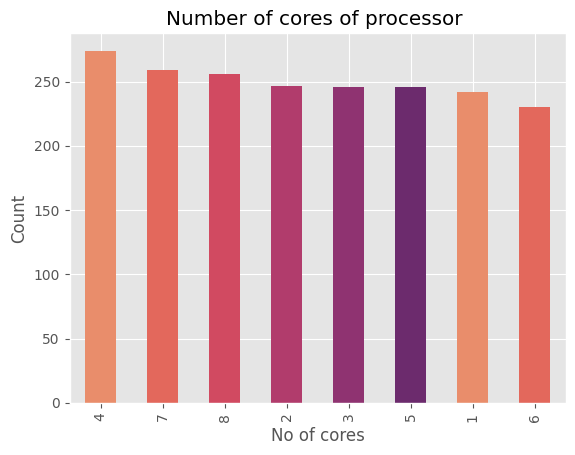

In [16]:
# No of cores
plt.style.use("ggplot")
train["n_cores"].value_counts().plot(kind="bar",color=sns.color_palette("flare"))
plt.ylabel("Count")
plt.title("Number of cores of processor ")
plt.xlabel("No of cores");

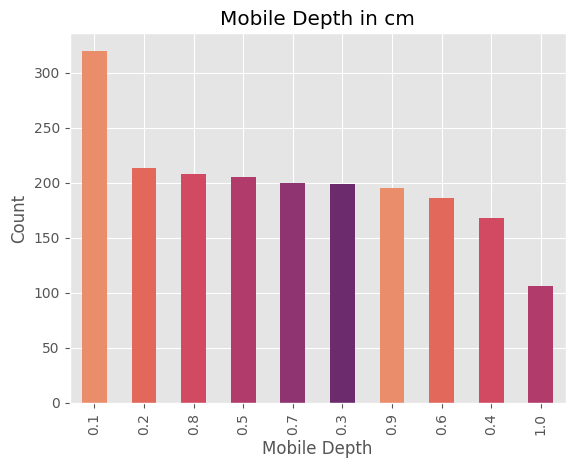

In [17]:
plt.style.use("ggplot")
train["m_dep"].value_counts().plot(kind="bar",color=sns.color_palette("flare"))
plt.ylabel("Count")
plt.title("Mobile Depth in cm")
plt.xlabel("Mobile Depth");

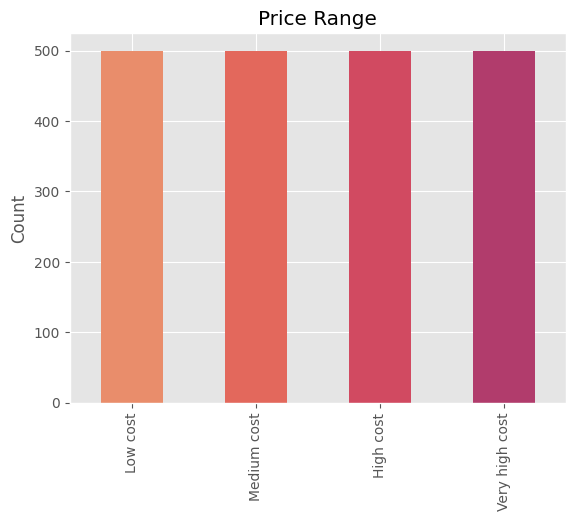

In [18]:

plt.style.use("ggplot")

label_map = {0: 'Low cost', 1: 'Medium cost', 2: 'High cost',3:'Very high cost'}

train["price_range"].value_counts().plot(kind="bar", color=sns.color_palette("flare"))

plt.xticks(train["price_range"].unique(), [label_map[val] for val in train["price_range"].unique()])

plt.ylabel("Count")
plt.title("Price Range")

plt.show()

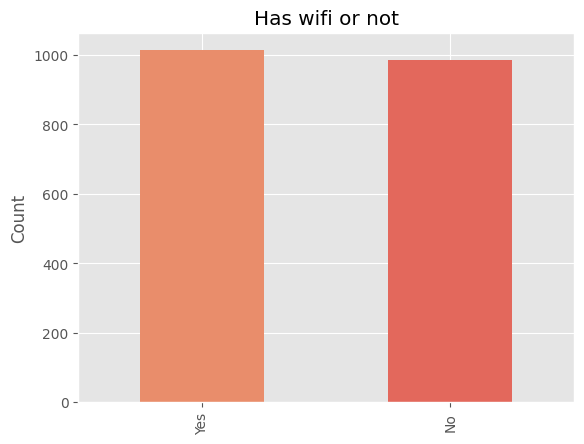

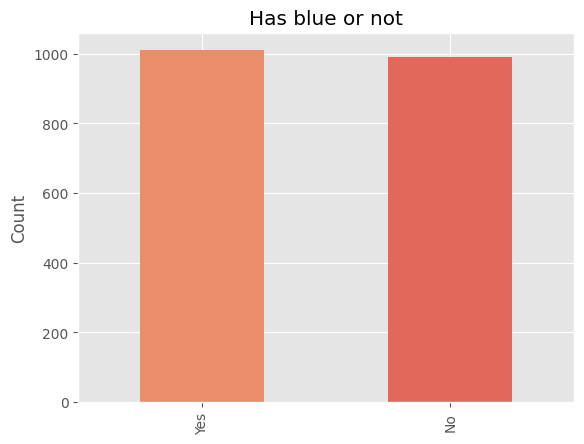

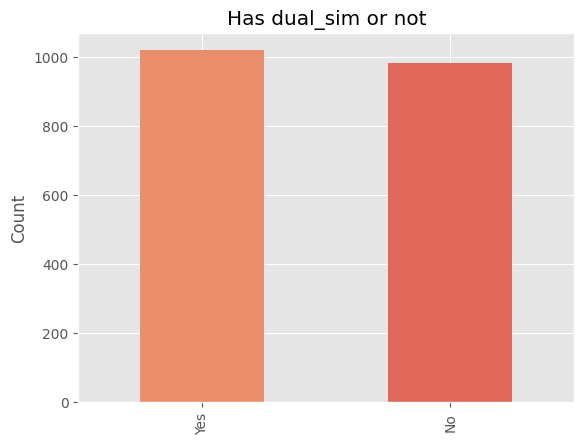

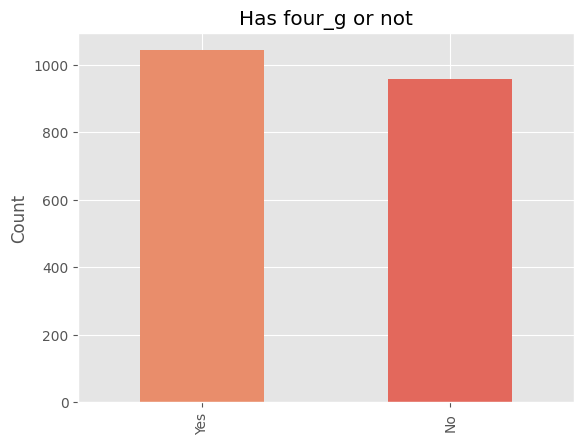

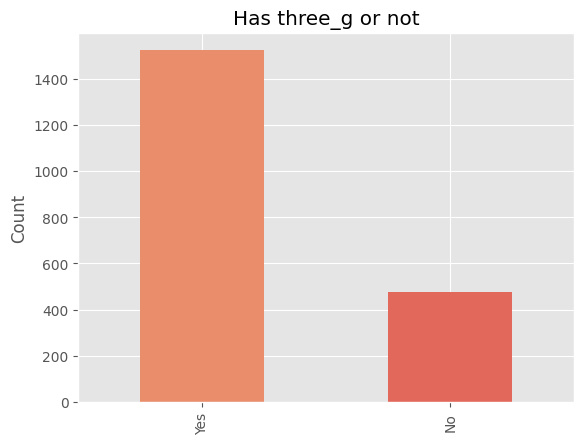

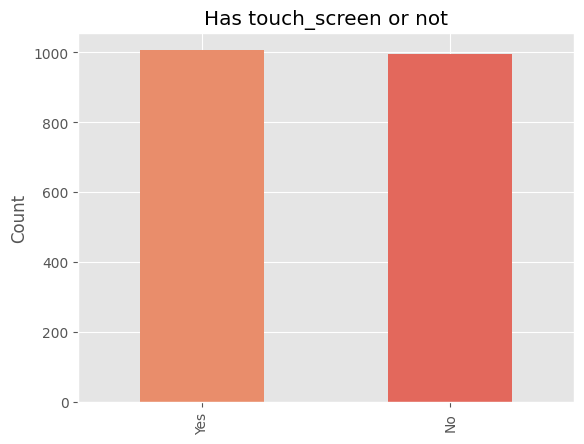

In [19]:

label_map={0: 'Yes',1:'No'}
for i in train[['wifi','blue','dual_sim','four_g','three_g','touch_screen']]:
  plt.style.use("ggplot")
  train[i].value_counts().plot(kind="bar",color=sns.color_palette("flare"))
  plt.xticks(train[i].unique(), [label_map[val] for val in train[i].unique()])
  plt.ylabel("Count")
  plt.title("Has %s or not"%i)
  plt.show()




Text(0.5, 1.0, 'Longest time that a single battery charge will last when you are')

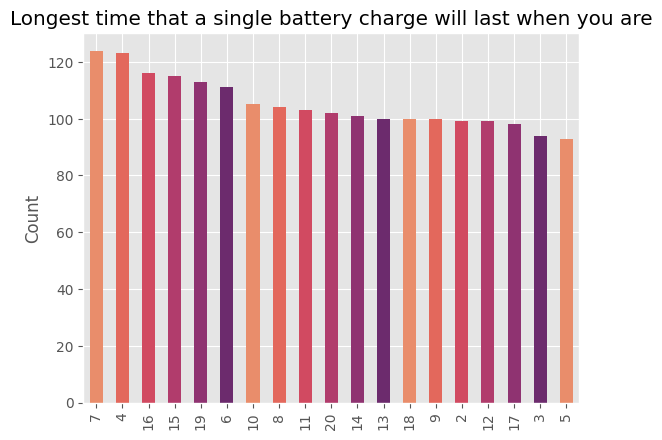

In [20]:
plt.style.use("ggplot")
train["talk_time"].value_counts().plot(kind="bar",color=sns.color_palette("flare"))
plt.ylabel("Count")
plt.title("Longest time that a single battery charge will last when you are")


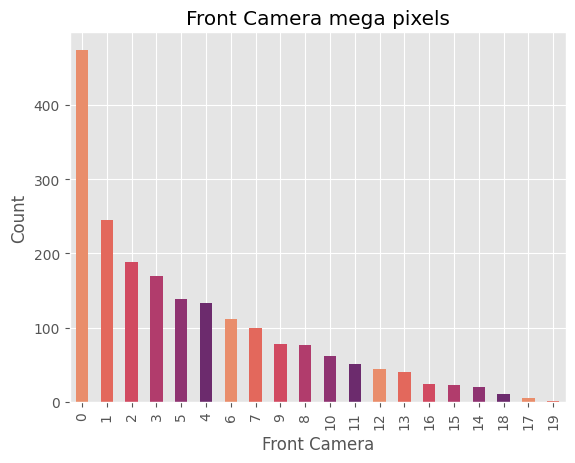

In [21]:
plt.style.use("ggplot")
train["fc"].value_counts().plot(kind="bar",color=sns.color_palette("flare"))
plt.ylabel("Count")
plt.title("Front Camera mega pixels")
plt.xlabel("Front Camera");

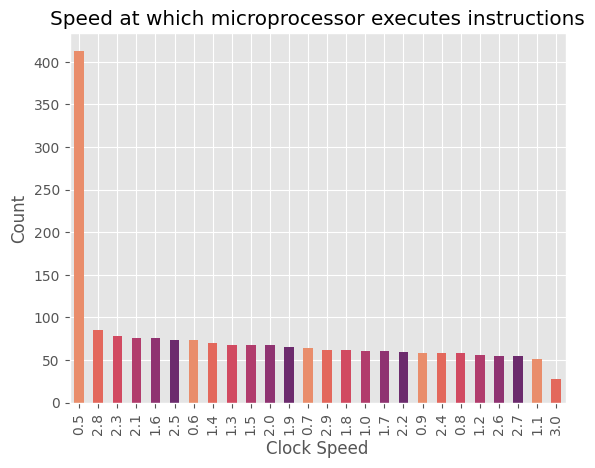

In [22]:
plt.style.use("ggplot")
train["clock_speed"].value_counts().plot(kind="bar",color=sns.color_palette("flare"))
plt.ylabel("Count")
plt.title("Speed at which microprocessor executes instructions")
plt.xlabel("Clock Speed");

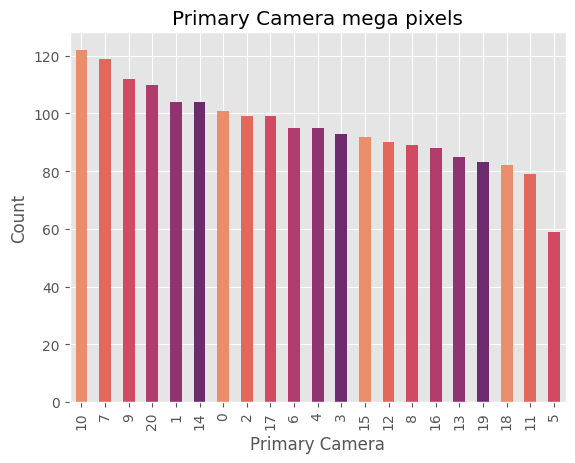

In [23]:
plt.style.use("ggplot")
train["pc"].value_counts().plot(kind="bar",color=sns.color_palette("flare"))
plt.ylabel("Count")
plt.title("Primary Camera mega pixels")
plt.xlabel("Primary Camera");

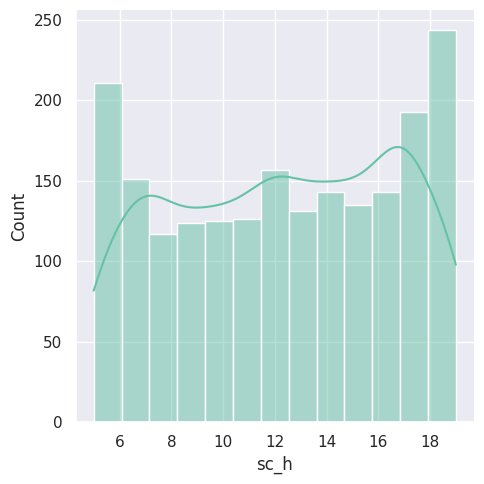

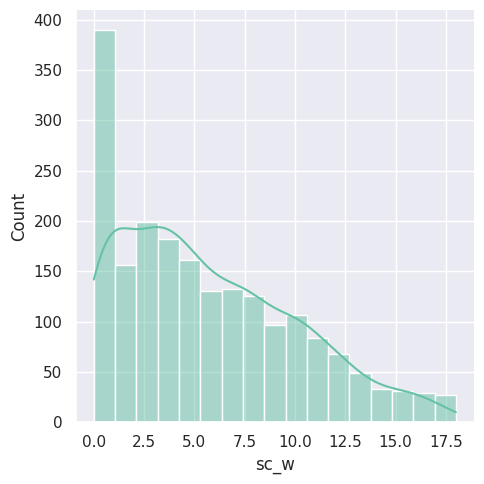

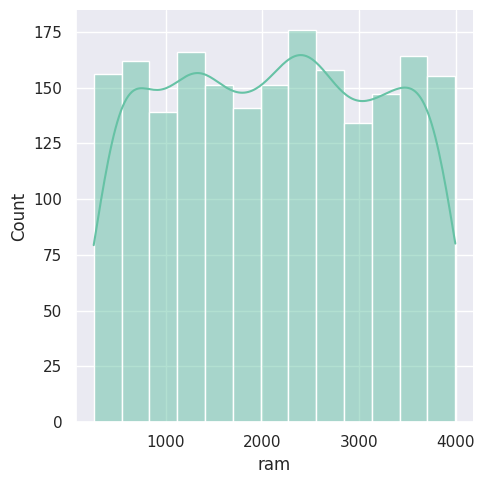

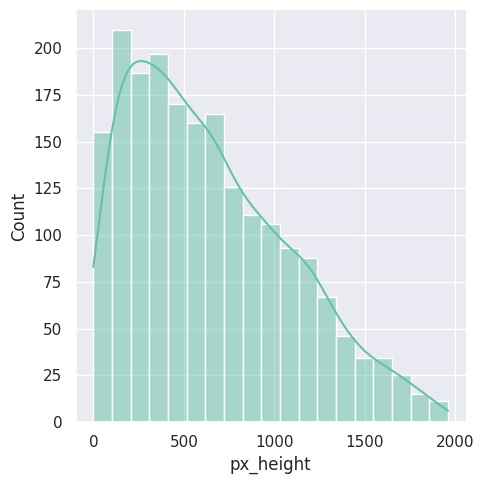

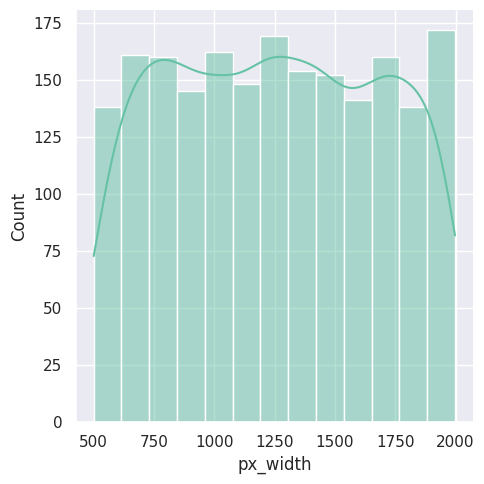

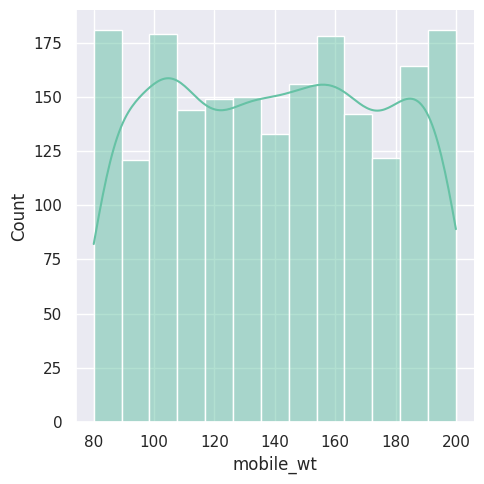

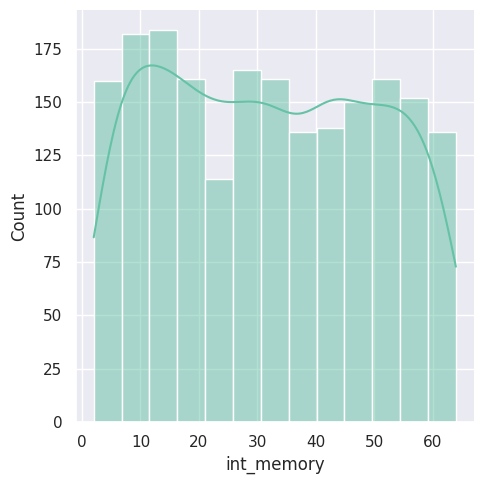

In [24]:
df_dis=train[['sc_h','sc_w','ram','px_height','px_width','mobile_wt','int_memory']]
for i in df_dis:
  sns.set_theme(palette='Set2')
  sns.displot(df_dis[i],kde=True)
  plt.show()


<Axes: >

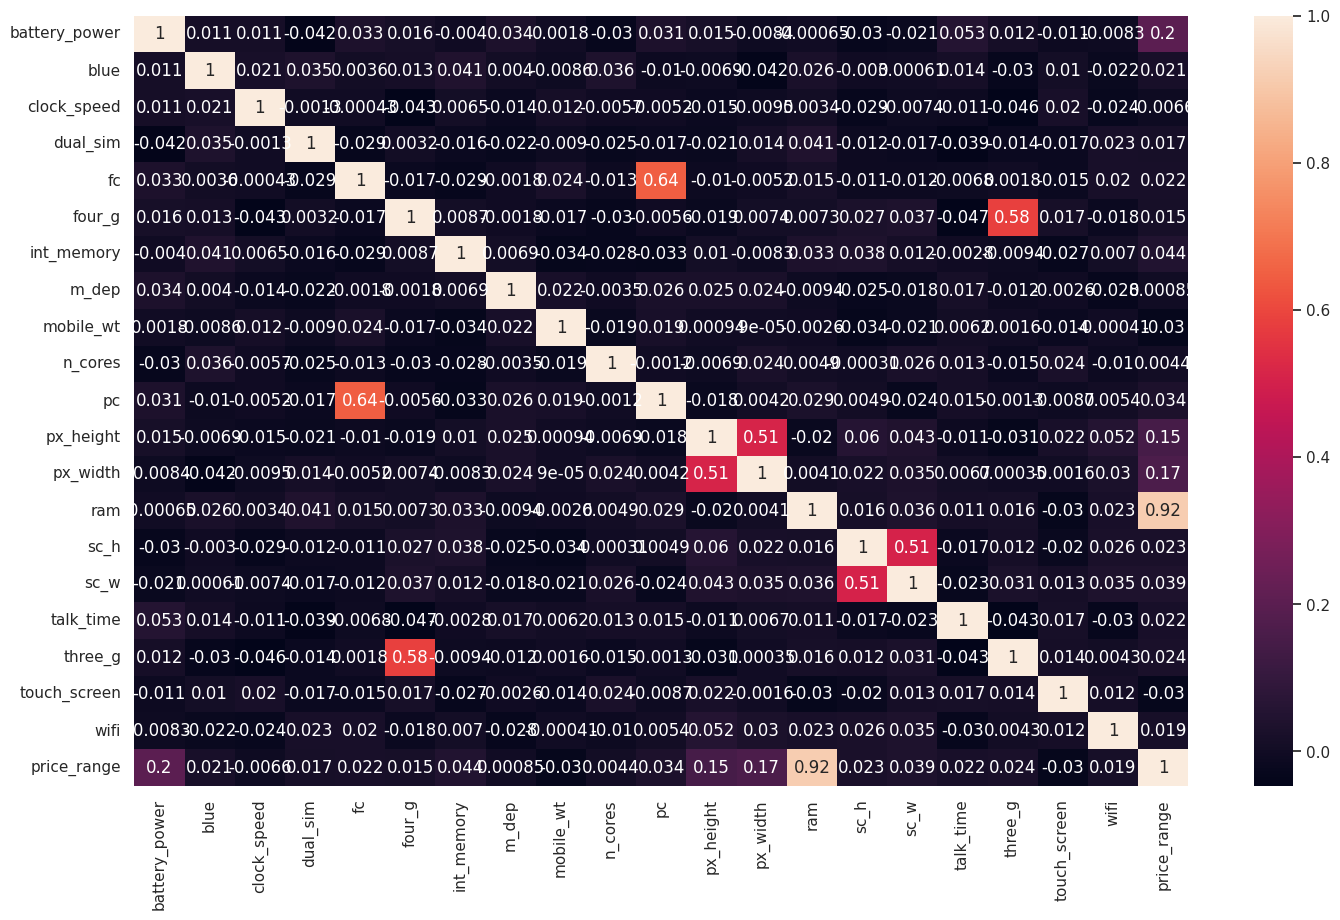

In [25]:
plt.figure(figsize=(17,10))
sns.heatmap(train.corr(),annot=True)

#Model Bulding


In [26]:
#split the data
X=train.drop(['price_range'],axis=1)
y = train['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Wrapper methods for Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
model=sfs(RandomForestClassifier(),k_features=10,forward=True,verbose=2,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.5s finished

[2023-09-08 18:58:38] Features: 1/10 -- score: 0.686875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   23.7s finished

[2023-09-08 18:59:02] Features: 2/10 -- score: 0.791875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
# Selected Features
model.k_feature_names_

In [ ]:
selected_features=train[['battery_power','blue','dual_sim','fc','four_g','int_memory','px_height','px_width','ram','wifi']]
# Split the data into features (X) and target (y)
X=selected_features
y = train['price_range']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

# Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();